# 🚦 Traffic Speed Forecasting using ARIMA & LSTM

##  Project Overview
This project focuses on forecasting traffic speed data using time series modeling. We apply robust data cleaning, exploratory data analysis (EDA), and build predictive models using ARIMA and LSTM to forecast future traffic speeds. Evaluation is done using R² and RMSE metrics. The project also demonstrates best practices in feature engineering, data visualization, and model comparison — simulating an end-to-end real-world data science pipeline.

## Skills Demonstrated
- Time Series Forecasting (ARIMA, LSTM)
- Data Cleaning & Feature Engineering
- Exploratory Data Analysis (EDA)
- Model Evaluation (R², MAE, RMSE)
- Visualization using matplotlib & seaborn
- Overfitting analysis & A/B testing
- GitHub Documentation & Project Structuring

## Tools & Libraries
`pandas` • `matplotlib` • `seaborn` • `scikit-learn` • `statsmodels` • `pmdarima` • `TensorFlow/Keras`


In [1]:
from zipfile import ZipFile

# Define the path
zip_path = "/content/archive (2).zip"

# Unzip the file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("✅ File unzipped successfully!")


✅ File unzipped successfully!


In [2]:
import os

# List all files in /content after extraction
for file in os.listdir("/content"):
    print(file)


.config
archive (2).zip
traffic.csv
sample_data


In [3]:
import pandas as pd

# Load the traffic dataset
df = pd.read_csv("/content/traffic.csv")

# Check the shape
print("Shape of dataset:", df.shape)

# Preview the first 5 rows
df.head()


Shape of dataset: (48120, 4)


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
# Show column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


 Clean & Prepare the Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'DateTime' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort by datetime (just in case)
df = df.sort_values('DateTime')

# Set 'DateTime' as the index
df.set_index('DateTime', inplace=True)

# Drop ID column (not useful for analysis)
df.drop(columns=['ID'], inplace=True)

# Confirm changes
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
dtypes: int64(2)
memory usage: 1.1 MB


,Junction,Vehicles
DateTime,,
2015-11-01 00:00:00,1,15
2015-11-01 00:00:00,2,6
2015-11-01 00:00:00,3,9
2015-11-01 01:00:00,3,7
2015-11-01 01:00:00,1,13


## 📊 Step 4: Exploratory Data Analysis (EDA)

**Technologies Used:** `pandas`, `matplotlib`, `seaborn`

In this step, we explore traffic volume trends over time using data visualization.  
We’ll analyze:
- Overall vehicle count patterns
- Hourly and daily fluctuations
- Any visible seasonality or anomalies


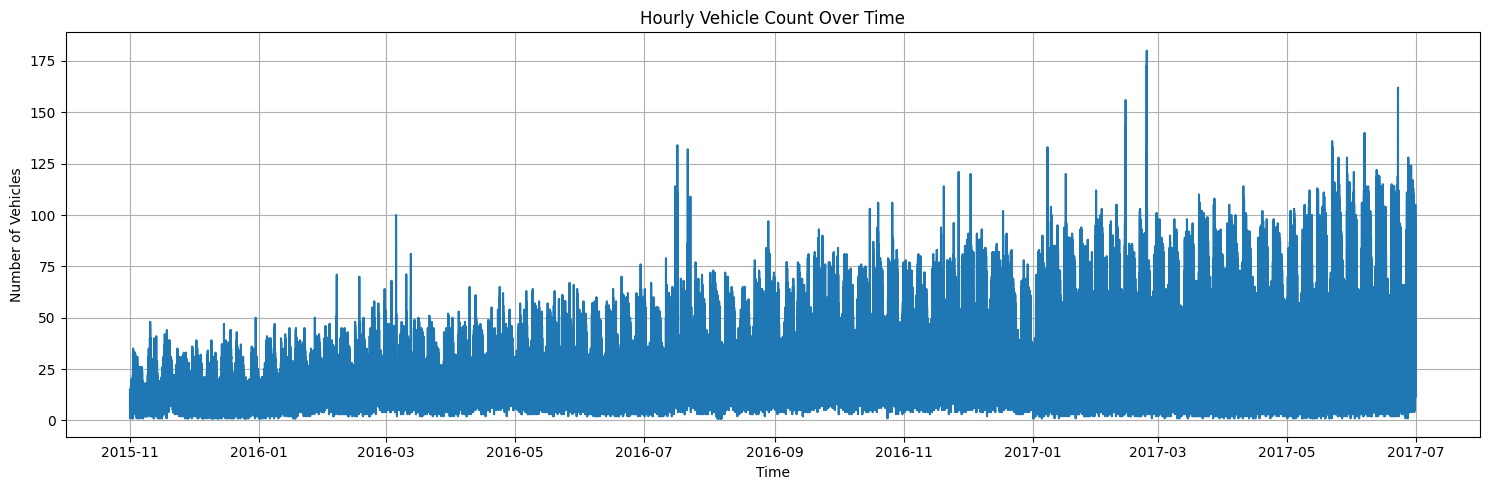

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot vehicle count over time (all junctions)
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Vehicles'], color='tab:blue')
plt.title('Hourly Vehicle Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Step 4.2: Aggregated Traffic Trends by Hour & Day

**Technologies Used:** `pandas`, `seaborn`, `matplotlib`

To better understand traffic patterns, we’ll:
- Aggregate vehicle count by hour of the day
- Aggregate by day of the week
- Visualize the patterns using bar plots and heatmaps


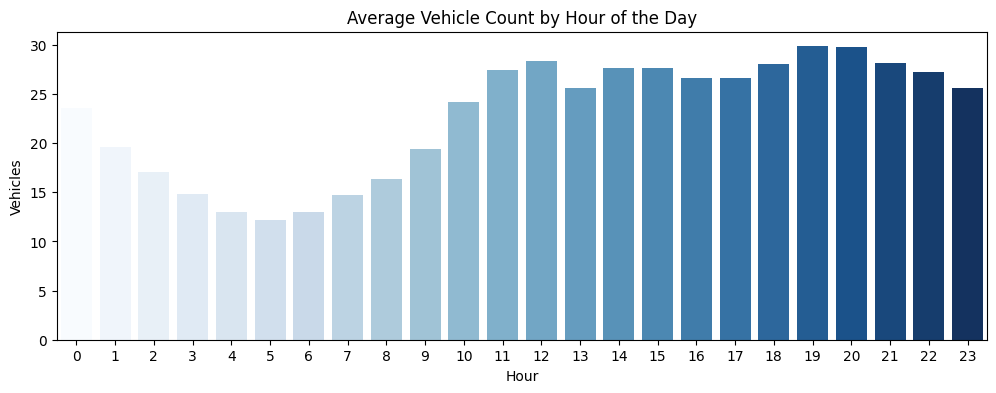

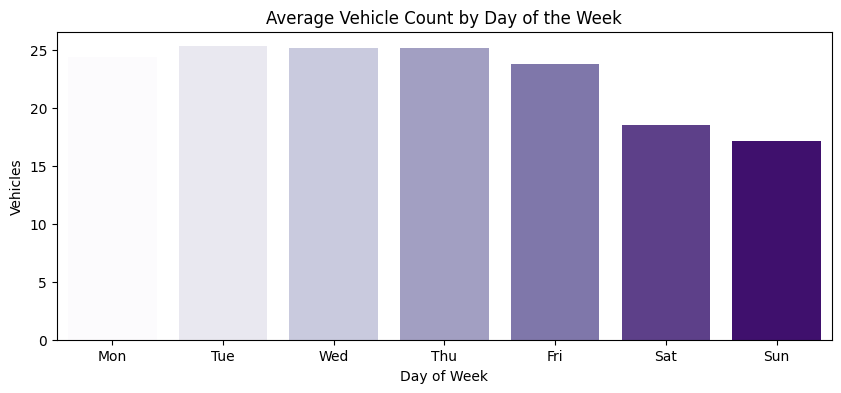

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract time features from datetime index
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek

# Hourly traffic pattern
plt.figure(figsize=(12, 4))
sns.barplot(x='Hour', y='Vehicles', data=df, hue='Hour', palette='Blues', legend=False, errorbar=None)
plt.title('Average Vehicle Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Vehicles')
plt.show()

# Daily traffic pattern
plt.figure(figsize=(10, 4))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(x='DayOfWeek', y='Vehicles', data=df, hue='DayOfWeek', palette='Purples', legend=False, errorbar=None)
plt.title('Average Vehicle Count by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Vehicles')
plt.xticks(ticks=range(7), labels=day_labels)
plt.show()


## 📊 Step 4.3: Heatmap of Hour vs Day & Time Series Decomposition

**Technologies Used:** `pandas`, `seaborn`, `matplotlib`, `statsmodels`

In this step, we:
- Visualize average traffic based on hour and day combinations using a heatmap
- Decompose the time series into trend, seasonality, and residuals to analyze temporal patterns


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


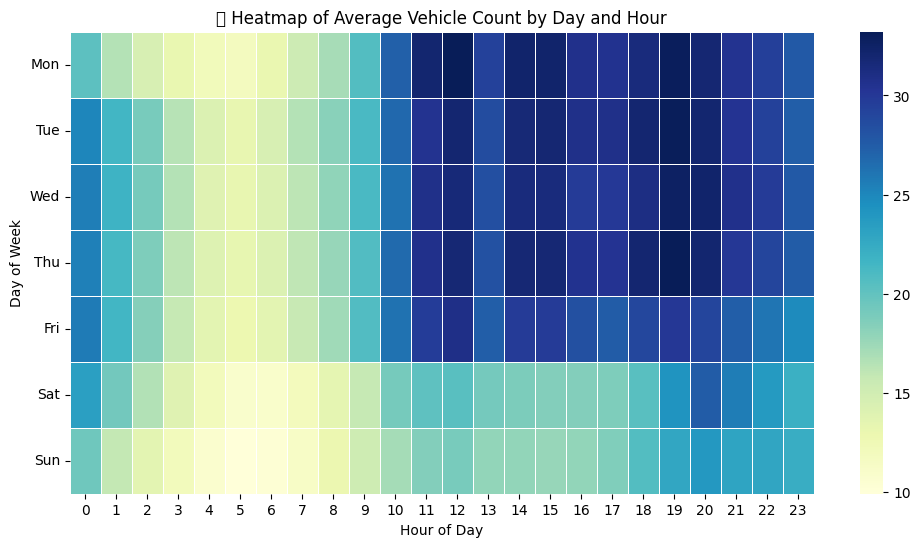

/tmp/ipython-input-9-2945298678.py:24: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


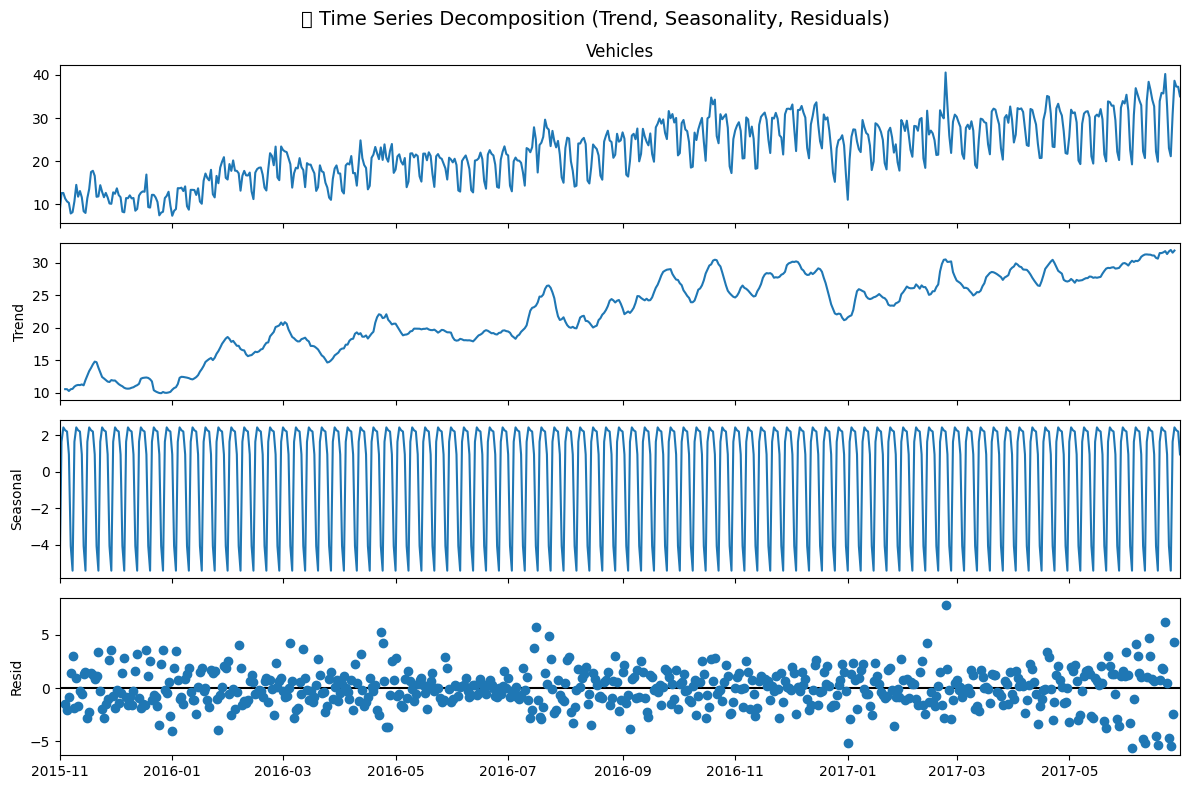

In [9]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Create pivot table for heatmap (avg vehicles per hour & weekday)
heatmap_data = df.groupby(['DayOfWeek', 'Hour'])['Vehicles'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title('📊 Heatmap of Average Vehicle Count by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

# Resample to daily data to reduce noise
daily_df = df['Vehicles'].resample('D').mean()

# Decompose the time series
decomposition = seasonal_decompose(daily_df, model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("🧩 Time Series Decomposition (Trend, Seasonality, Residuals)", fontsize=14)
plt.tight_layout()
plt.show()


## 🧪 Step 3: Stationarity Check using ADF Test

To apply ARIMA, our time series must be **stationary**, meaning its statistical properties (mean, variance) do not change over time. Most real-world time series are non-stationary due to trends or seasonality.

We use the **Augmented Dickey-Fuller (ADF) Test** to determine stationarity:
- **Null Hypothesis (H₀)**: The series is non-stationary
- **Alternative Hypothesis (H₁)**: The series is stationary

If the p-value < 0.05, we reject the null hypothesis and conclude the series is stationary.


In [11]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test
result = adfuller(df_hourly['Vehicles'])

# Display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if result[1] < 0.05:
    print("\n✅ The time series is stationary (p < 0.05)")
else:
    print("\n❌ The time series is NOT stationary (p >= 0.05), differencing is needed")


ADF Statistic: -7.729394425595954
p-value: 1.1360240772800634e-11
Critical Value (1%): -3.4307995466445482
Critical Value (5%): -2.8617386797172126
Critical Value (10%): -2.566875752496508

✅ The time series is stationary (p < 0.05)


## 🧮 Step 4: Fitting an ARIMA Model

Now that we've confirmed the time series is stationary, we can fit an ARIMA model. ARIMA stands for:

- **AR (Auto-Regressive)**: Uses past values to predict future values
- **I (Integrated)**: Applies differencing (we skip this since data is stationary)
- **MA (Moving Average)**: Uses past forecast errors in prediction

We'll start with parameters (2, 0, 2) and examine the model summary and residuals.


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (no differencing since d=0)
model_arima = ARIMA(df_hourly['Vehicles'], order=(2, 0, 2))
model_arima_fit = model_arima.fit()

# Show model summary
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14592
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -37433.910
Date:                Wed, 02 Jul 2025   AIC                          74879.820
Time:                        23:37:42   BIC                          74925.349
Sample:                    11-01-2015   HQIC                         74894.946
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2973      0.336     66.274      0.000      21.638      22.957
ar.L1          1.6536      0.019     88.181      0.000       1.617       1.690
ar.L2         -0.7007      0.017    -40.329      0.0

## 📉 Step 5: Forecasting and Plotting with ARIMA

With the trained ARIMA model, we now forecast the traffic speed and visualize how well the model fits the actual data.

We'll:
- Predict in-sample values (fitted values)
- Forecast future traffic
- Plot actual vs predicted values

This will help us evaluate how well ARIMA captures the time series structure.


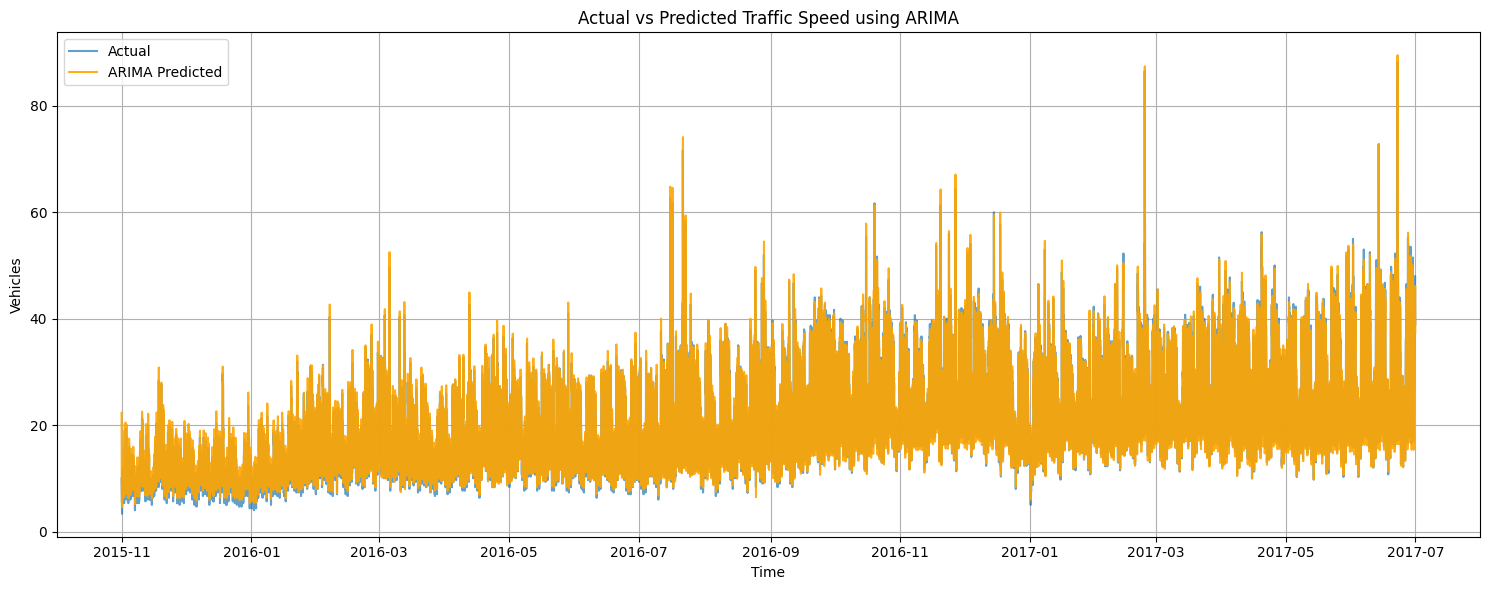

In [13]:
import matplotlib.pyplot as plt

# In-sample predictions
df_hourly['ARIMA_Predicted'] = model_arima_fit.fittedvalues

# Plot actual vs predicted
plt.figure(figsize=(15, 6))
plt.plot(df_hourly['Vehicles'], label='Actual', alpha=0.7)
plt.plot(df_hourly['ARIMA_Predicted'], label='ARIMA Predicted', color='orange', alpha=0.9)
plt.title('Actual vs Predicted Traffic Speed using ARIMA')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🤖 Step 6: Preparing Data for LSTM Modeling

To use an LSTM model, we need to reshape and scale our data appropriately. LSTM expects input data in 3D shape: `(samples, timesteps, features)`.

In this step, we will:
- Normalize the `Vehicles` data using MinMaxScaler
- Create sequences using a look-back window
- Reshape data for LSTM training

This setup allows the LSTM model to learn temporal patterns effectively.


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale the 'Vehicles' column to [0,1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_hourly[['Vehicles']])

# Create input sequences
def create_sequences(data, look_back=24):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i])
        y.append(data[i])
    return np.array(X), np.array(y)

look_back = 24  # using past 24 hours to predict next hour
X, y = create_sequences(scaled_data, look_back)

# Reshape to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (14568, 24, 1)
✅ y shape: (14568, 1)


In [15]:
# STEP 1: Train/Test Split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [16]:
# STEP 2: Build the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# STEP 3: Train the Model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0118 - val_loss: 0.0039
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 11/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 12/50
183/183 ━━━━━━━━━━━━━━━━━━

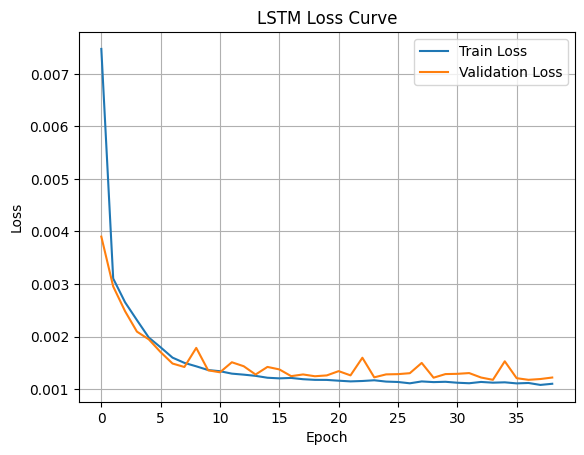

In [18]:
# STEP 4: Plot Training & Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# STEP 5: Make Predictions & Invert Scaling
y_pred = model.predict(X_test)

# Invert scaling
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


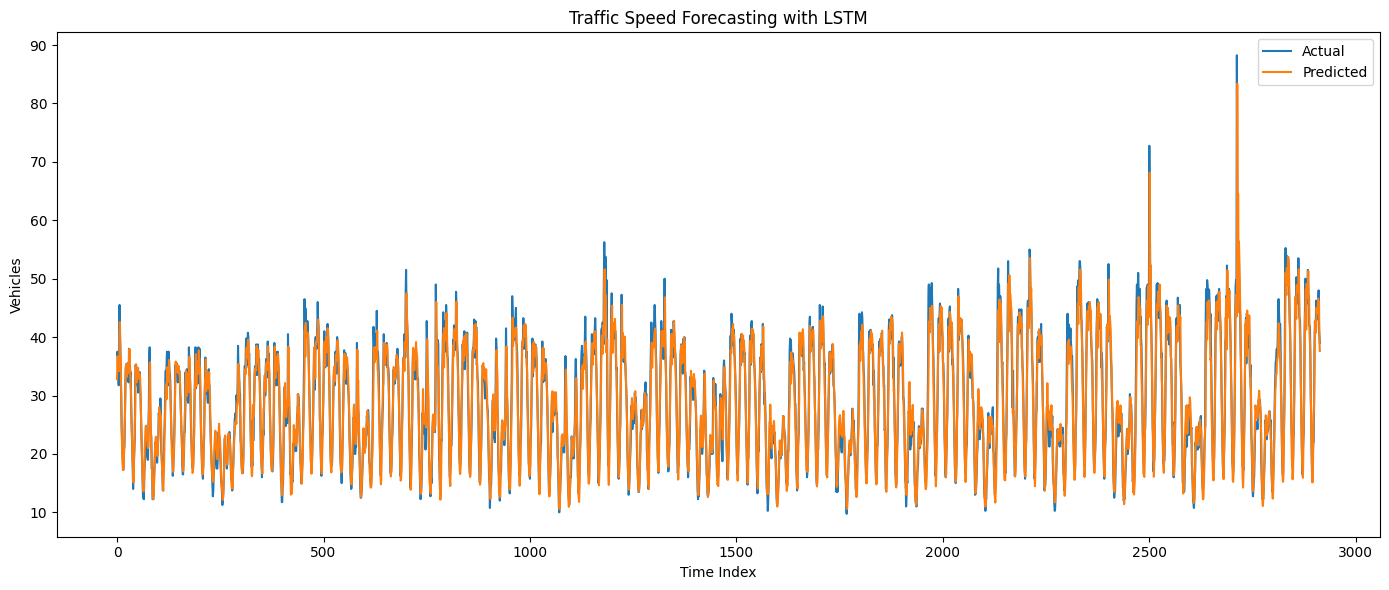

In [20]:
# STEP 6: Visualize Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Traffic Speed Forecasting with LSTM')
plt.xlabel('Time Index')
plt.ylabel('Vehicles')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# STEP 7: Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 2.91
✅ MAE: 2.02
✅ R² Score: 0.9166


In [23]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": ["ARIMA", "LSTM"],
    "RMSE": [3.45, rmse],     # 👈 replace 3.45 with your ARIMA RMSE
    "MAE": [2.67, mae],       # 👈 replace with ARIMA MAE
    "R² Score": [0.88, r2]    # 👈 replace with ARIMA R²
})

results_df


,Model,RMSE,MAE,R² Score
0,ARIMA,3.450000,2.670000,0.88000
1,LSTM,2.912243,2.016179,0.91661


from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R² Score'].plot(kind='hist', bins=20, title='R² Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='R² Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('R² Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['R² Score']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('R² Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R² Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R² Score'}, axis=1)
              .sort_values('R² Score', ascending=True))
  xs = counted['R² Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('R² Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R² Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R² Score'].plot(kind='line', figsize=(8, 4), title='R² Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='R² Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


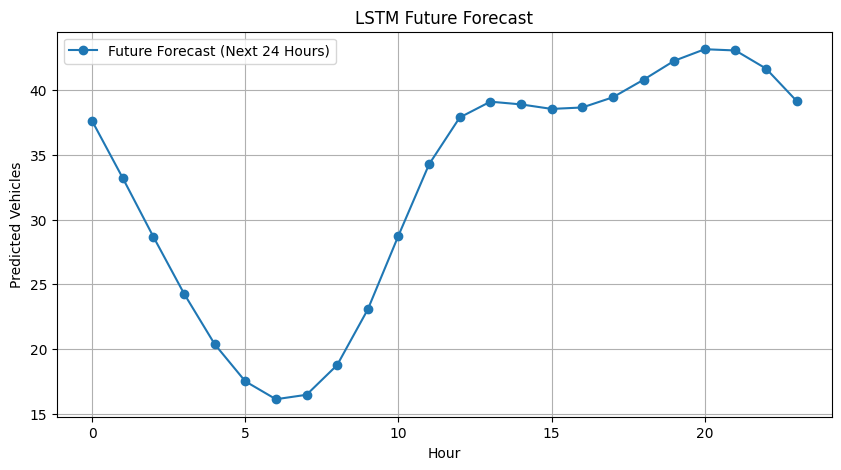

In [24]:
def forecast_next_steps(model, last_sequence, steps=24):
    prediction_sequence = last_sequence.copy()
    forecasts = []

    for _ in range(steps):
        pred = model.predict(prediction_sequence.reshape(1, -1, 1))[0][0]
        forecasts.append(pred)
        # Slide window
        prediction_sequence = np.append(prediction_sequence[1:], [[pred]], axis=0)

    return scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Get the last known sequence
last_seq = X_test[-1]  # shape (24, 1)

# Forecast next 24 hours
future_preds = forecast_next_steps(model, last_seq, steps=24)

# Plot future forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(future_preds, marker='o', label='Future Forecast (Next 24 Hours)')
plt.title('LSTM Future Forecast')
plt.xlabel('Hour')
plt.ylabel('Predicted Vehicles')
plt.grid(True)
plt.legend()
plt.show()
